# Problem Statement
- The main objective of this project is to build a model that predict the housing prices in California using the California census data.
- This data has attribute such as the population, median income, median housing price, and so on for each block group(districts) in California.

## About The Problem
- The model’s output (a prediction of a district’s median housing price) will be fed to another Machine Learning system along with many other signals.This downstream system will determine whether it is worth investing in a given area or not. Getting this right is critical, as it directly affects revenue.
- currently the district housing prices are estimated manually by experts: a team gathers up-to-date information about a district, and when they cannot get the median housing price, they estimate it using complex rules. This is costly and time-consuming, and their estimates are not great; in cases where they manage to find out the actual median housing price, they often realize that their estimates were off by more than 20%. This is why the company thinks that it would be useful to train a model to predict a district’s median housing price given other data about that district.

## Importing Necessary Libraries

In [1]:
# for dataframe manipulation and analysis
import pandas as pd
import numpy as np

# for data visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns

# warning filtering library
import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [2]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### About the dataset
- Each row represents one district. 
- There are 10 attributes - longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value(whose value is to be predicted) and ocean_proximity.

# Exploratory Data Analysis and Data cleaning

### Take a quick look at the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
df.duplicated().sum()

0

#### Analysis
- There are 20640 records and 10 attributes.
- Total_bedrooms feature has missing values.
- ocean_proximity feature is in categorical form.so that feature has to be encoded.

### Understanding numerical features

In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


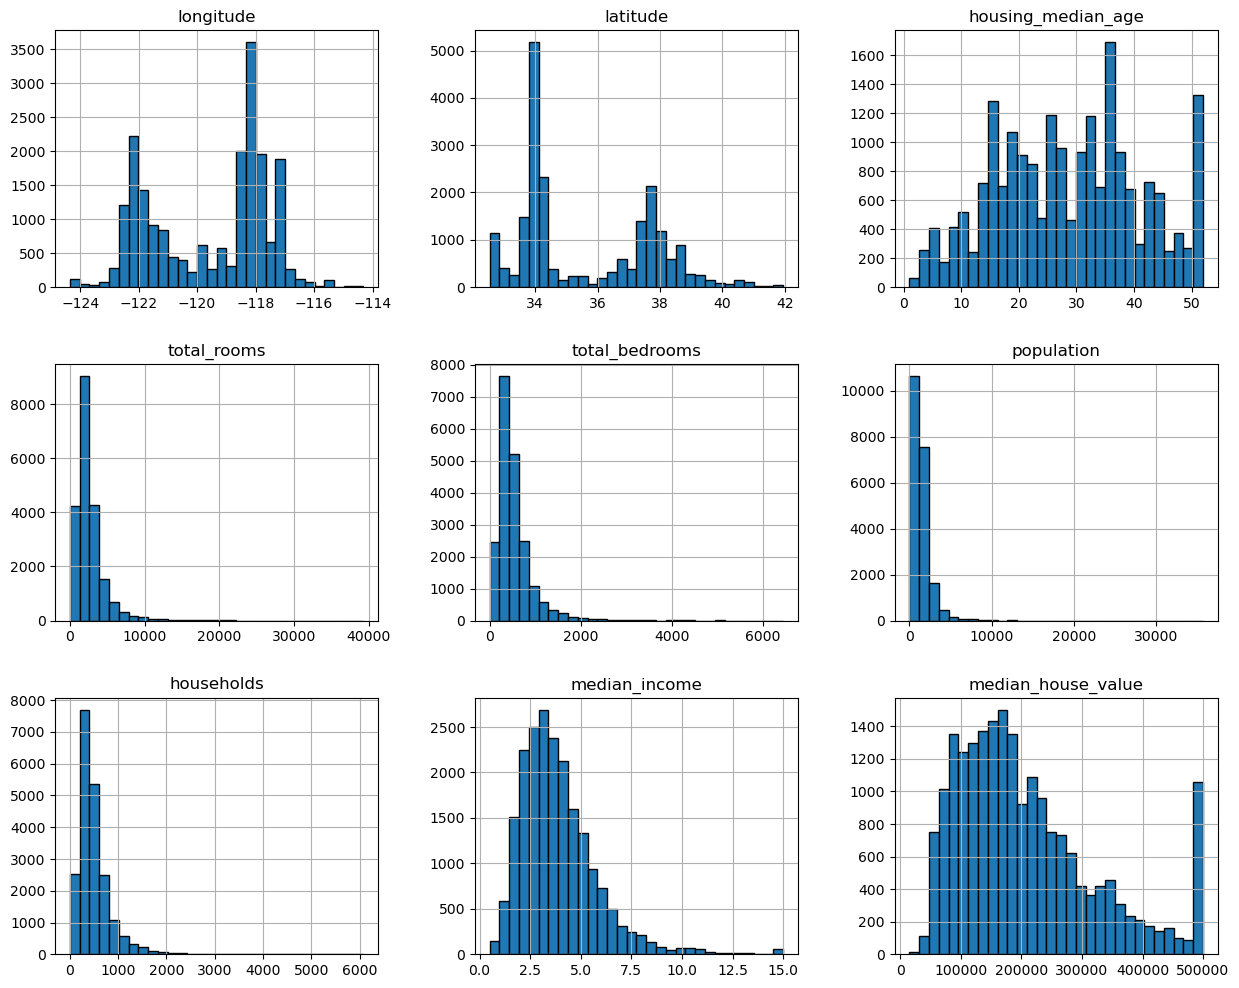

In [7]:
df.hist(bins = 30,figsize = (15,12),edgecolor = 'black')
plt.show()

#### Key takeaways
- median_house_value has been capped at 500000.
- Many histograms are tail heavy(skewed).
- These attributes have different scales.

- To make model that precisely predict even beyond 500000,exclude those data points which are capped at 500000

In [8]:
df = df[df['median_house_value']<500000]
df = df.reset_index(drop = True)

## Create a test set

In [9]:
from sklearn.model_selection import train_test_split
train_data,test_data = train_test_split(df,test_size = 0.2,random_state = 42,shuffle = True)

# Visualizing data to gain insights

In [10]:
sample_data = train_data.copy()

### Visualizing geographical data

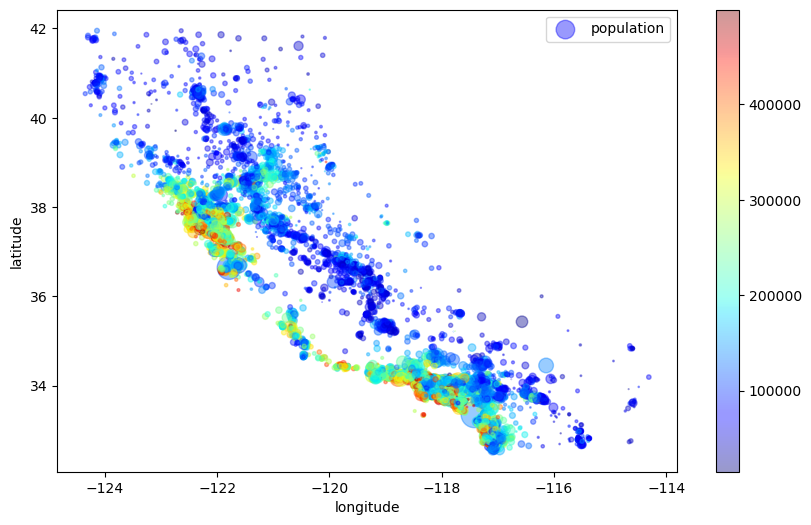

In [11]:
sample_data.plot(kind = 'scatter',x = 'longitude',y = 'latitude',alpha = 0.4,
                s = sample_data['population']/100,c = sample_data['median_house_value'],
                cmap = 'jet',figsize = (10,6),label = 'population')
plt.legend()

- So housing price is much related to location and population.

## Looking for correlation

In [12]:
sample_data.corr()['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.648201
total_rooms           0.143877
households            0.093670
total_bedrooms        0.073196
housing_median_age    0.064449
population            0.012270
longitude            -0.045004
latitude             -0.150427
Name: median_house_value, dtype: float64

median_income and median_house_value has strong correlation.

## Feature engineering

### Experimenting with attribute combination

In [13]:
sample_data['rooms_per_household'] = sample_data['total_rooms']/sample_data['households']
sample_data['bedroom_per_room'] = sample_data['total_bedrooms']/sample_data['total_rooms']
sample_data['population_per_household'] = sample_data['population']/sample_data['households']

In [14]:
sample_data.corr()['median_house_value'].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.648201
total_rooms                 0.143877
rooms_per_household         0.110973
households                  0.093670
total_bedrooms              0.073196
housing_median_age          0.064449
population                  0.012270
population_per_household   -0.019716
longitude                  -0.045004
latitude                   -0.150427
bedroom_per_room           -0.224358
Name: median_house_value, dtype: float64

so new added features are more correlated with the target variable.

## Summary of EDA
- Total_bedrooms feature has missing values.
- ocean_proximity feature is in categorical form.so that feature has to be encoded.
- Features have different scales.
- new combination of features can be useful.
- Many attributes are skewed(There are chances of outliers).

## Preparing the data for Ml model

### Data cleaning
#### Preparation steps to do
- Treat missing values
- convert categorical data to continous form.
- Feature scaling.
- Add new combination of columns.

### Adding new features

In [15]:
train_data['rooms_per_household'] = train_data['total_rooms']/train_data['households']
train_data['bedroom_per_room'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['population_per_household'] = train_data['population']/train_data['households']

In [16]:
X_train = train_data.drop('median_house_value',axis = 1)
y_train = train_data[['median_house_value']]

### Transformation Pipeline

In [17]:
# Data preprocessing Libraries
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [18]:
num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy = 'median')),
    ('std_scaler',StandardScaler()),
])

In [19]:
num = X_train.drop('ocean_proximity',axis = 1)
num_attribute = list(num)
cat_attribute = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num',num_pipeline,num_attribute),
    ('cat',OneHotEncoder(),cat_attribute),    
])

In [20]:
X_train = full_pipeline.fit_transform(X_train)

# Model Building

## Training and evaluating different models

In [21]:
# for model building
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
import xgboost

# for model evaluation
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

In [22]:
def model_builder(model_name,estimator,x,y):
    estimator.fit(x,y)
    y_pred = estimator.predict(x)
    accuracy = r2_score(y,y_pred)
    rmse = np.sqrt(mean_squared_error(y,y_pred))
    return [model_name,accuracy,rmse]

In [23]:
def master_model(x,y):
    result = pd.DataFrame(columns = ['Model name','accuracy','rmse'])
    result.loc[len(result)] = model_builder('Linear regression',LinearRegression(),x,y)   
    result.loc[len(result)] = model_builder('Decision tree',DecisionTreeRegressor(),x,y)    
    result.loc[len(result)] = model_builder('KNN',KNeighborsRegressor(),x,y)    
    result.loc[len(result)] = model_builder('SVM',SVR(kernel = 'linear'),x,y)
    result.loc[len(result)] = model_builder('Random forest',RandomForestRegressor(),x,y)
    result.loc[len(result)] = model_builder('Adaboost',AdaBoostRegressor(),x,y)    
    result.loc[len(result)] = model_builder('Gradient boost',GradientBoostingRegressor(),x,y)    
    result.loc[len(result)] = model_builder('XG boost',XGBRegressor(),x,y)
    return result.sort_values(by = 'accuracy',ascending = False)

In [24]:
master_model(X_train,y_train)

,Model name,accuracy,rmse
1,Decision tree,1.000000,0.000000
4,Random forest,0.970616,16611.410384
7,XG boost,0.936486,24422.265614
2,KNN,0.791663,44231.602964
6,Gradient boost,0.778254,45632.852344
0,Linear regression,0.625714,59285.885247
5,Adaboost,0.446323,72107.052202
3,SVM,0.106604,91594.927403


## Evaluation using cross validation

In [25]:
def Kfoldcv(x,y,fold = 10):
    score_lr = cross_val_score(LinearRegression(),x,y,scoring = 'neg_mean_squared_error',cv = fold)
    cv_score_lr = np.sqrt(-score_lr)
    score_dt = cross_val_score(DecisionTreeRegressor(),x,y,scoring = 'neg_mean_squared_error',cv = fold) 
    cv_score_dt = np.sqrt(-score_dt)
    score_knn = cross_val_score(KNeighborsRegressor(),x,y,scoring = 'neg_mean_squared_error',cv = fold)  
    cv_score_knn = np.sqrt(-score_knn)
    score_svr = cross_val_score(SVR(kernel = 'linear'),x,y,scoring = 'neg_mean_squared_error',cv = fold)
    cv_score_svr = np.sqrt(-score_svr)
    score_rf = cross_val_score(RandomForestRegressor(),x,y,scoring = 'neg_mean_squared_error',cv = fold)
    cv_score_rf = np.sqrt(-score_rf)
    score_ab = cross_val_score(AdaBoostRegressor(),x,y,scoring = 'neg_mean_squared_error',cv = fold) 
    cv_score_ab = np.sqrt(-score_ab)
    score_gb = cross_val_score(GradientBoostingRegressor(),x,y,scoring = 'neg_mean_squared_error',cv = fold) 
    cv_score_gb = np.sqrt(-score_gb)
    score_xgb = cross_val_score(XGBRegressor(),x,y,scoring = 'neg_mean_squared_error',cv = fold) 
    cv_score_xgb = np.sqrt(-score_xgb)
    
    model_names = ['Linear regression','Decision tree','KNN','SVM','Random forest','Adaboost',
                  'Gradient boost','XG boost']
    scores = [cv_score_lr,cv_score_dt,cv_score_knn,cv_score_svr,cv_score_rf,cv_score_ab,cv_score_gb,cv_score_xgb]
    
    result = []
    for i in range(len(model_names)):
        scores_mean = np.mean(scores[i])
        scores_std = np.std(scores[i])
        model = model_names[i]
        result.append([model,scores_mean,scores_std])
    
    kfolddf = pd.DataFrame(result,columns = ['Model name','cv_mean','cv_std'])
    return kfolddf.sort_values(by = ['cv_mean','cv_std'])

In [26]:
Kfoldcv(X_train,y_train)

,Model name,cv_mean,cv_std
7,XG boost,42211.278850,1677.275829
4,Random forest,44642.508874,1507.191930
6,Gradient boost,47971.440790,1632.825963
2,KNN,54758.332112,1626.429935
0,Linear regression,59505.510084,1954.926020
1,Decision tree,63727.973716,2106.380978
5,Adaboost,71166.822034,3505.942286
3,SVM,92202.105556,2057.926646


##  Training model analysis

### Learning curve analysis

In [27]:
from sklearn.model_selection import learning_curve

In [28]:
def learn_curve(model_name,estimator,x,y):
    train_size,train_score,test_score = learning_curve(estimator,x,y,cv = 10,scoring = 'neg_mean_squared_error',
                                                       shuffle = True,random_state = 5,
                                                       train_sizes = [1,500,3000,6000,8000,10000,12000,14146])
    train_score_mean = np.mean(np.sqrt(-train_score),axis = 1)
    test_score_mean = np.mean(np.sqrt(-test_score),axis = 1)
    plt.plot(train_size,train_score_mean,c = 'red')
    plt.plot(train_size,test_score_mean,c = 'blue')
    plt.xlabel('samples size')
    plt.ylabel('scores')
    plt.title('learning curve for '+ model_name)
    plt.legend(('training score','testing score'))
    plt.ylim(0,120000)
    plt.show()

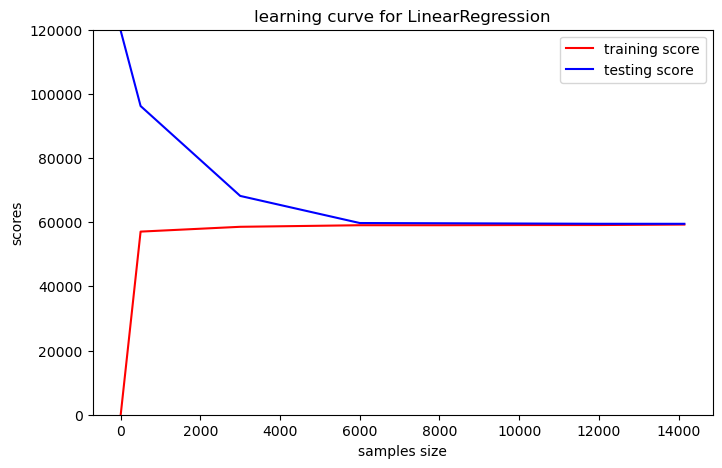

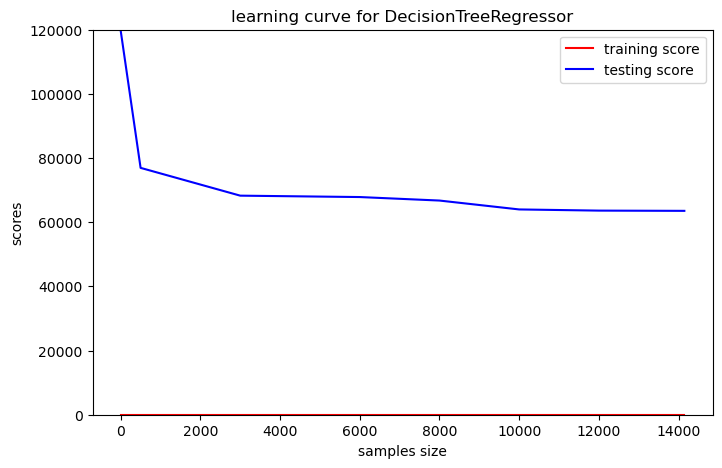

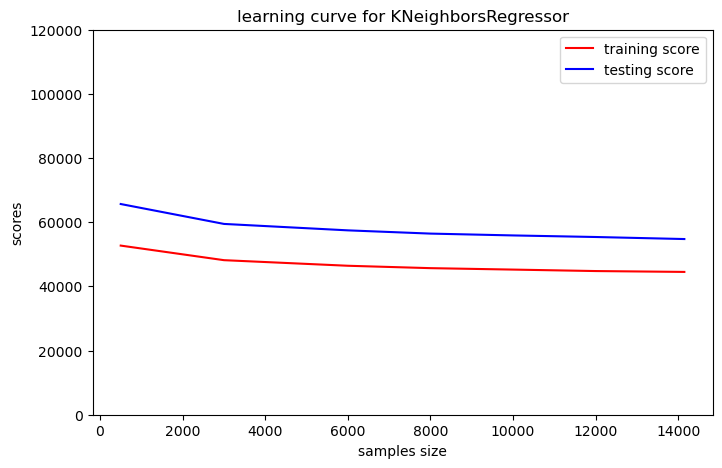

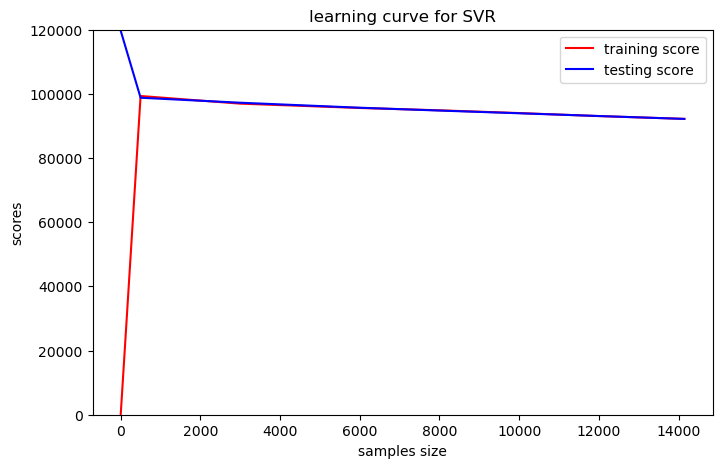

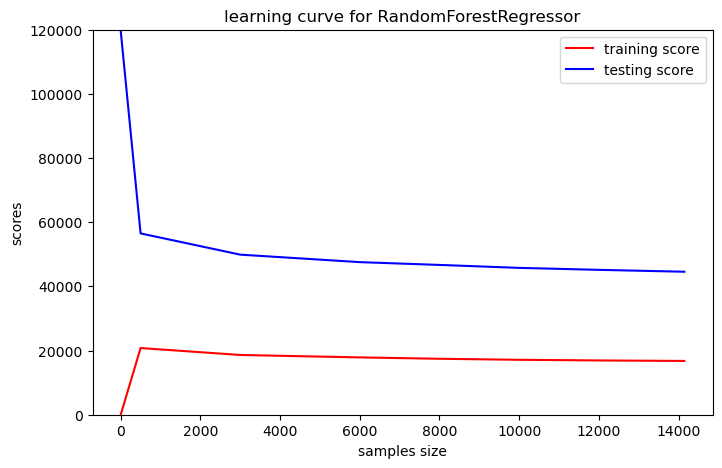

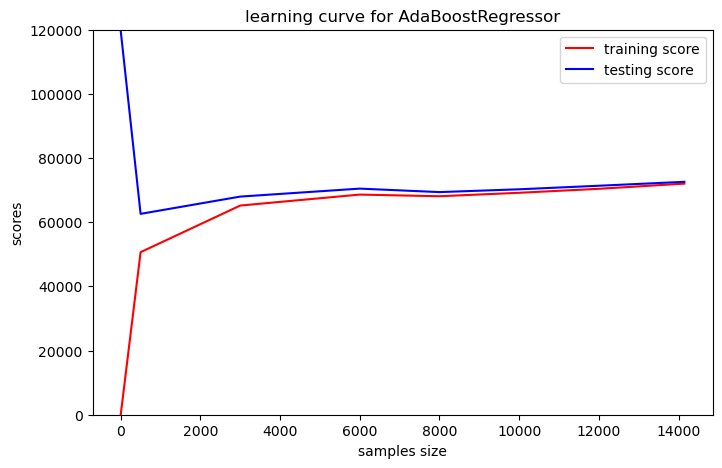

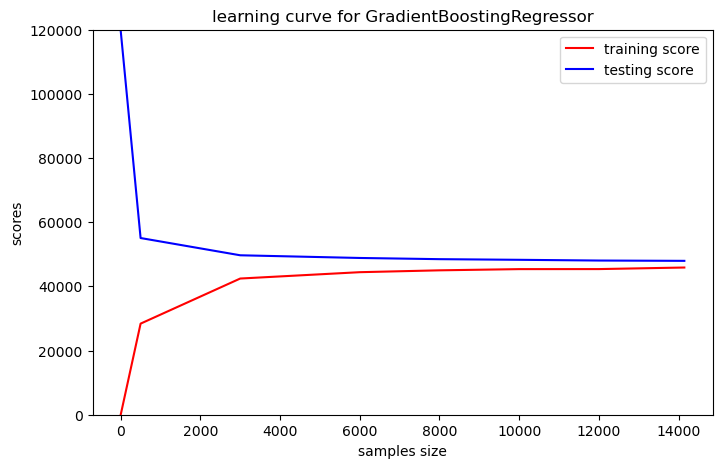

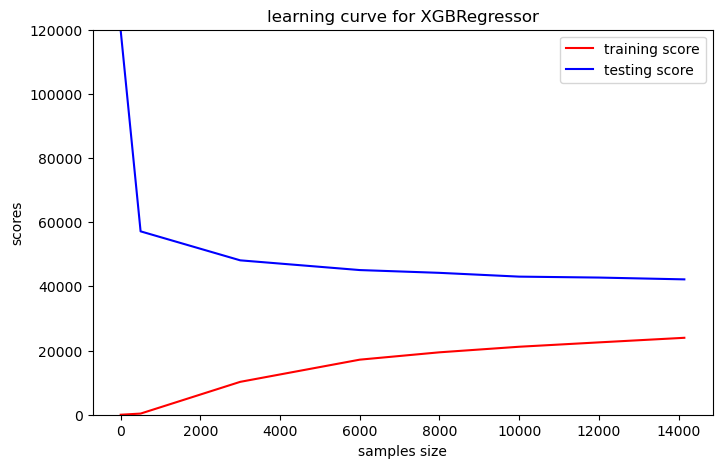

In [29]:
model_names = [LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(kernel = 'linear'),
              RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),XGBRegressor()]

for model in model_names:
    plt.figure(figsize = (8,5))
    learn_curve(type(model).__name__,model,X_train,y_train)

### Conclusions(after cross validation and from learning curve).
- Linear regression,KNN,SVR,Ada boost and Gradient boost model has high bias and low variance.They are underfitting the dataset.
- Decision Tree is highly overfitting the dataset.
- Random Forest and Xgboost are also overfitting the dataset. but they have low bias and performing better compared to other models(but still they have high variance).Since more training data cannot be added,regularizing this model can reduce the generalization error.

- So select XG boost and Random Forest for hyperparameter tuning

## Hyperparameter Tuning

In [44]:
# Importing gridsearchcv 
from sklearn.model_selection import GridSearchCV

### Fine tuning XGboost

In [31]:
# parameter grid
param_xgb = {'n_estimators' : [300,400,500,600],'max_depth' : [3,5,7],'eta' : [0.1,0.13,0.15]}

# creating model object   
grid_xgb = GridSearchCV(XGBRegressor(),param_xgb,cv = 10,scoring = 'neg_mean_squared_error',
                              return_train_score = True)

# model fitting
grid_xgb.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estima

In [32]:
grid_xgb.best_params_

{'eta': 0.1, 'max_depth': 7, 'n_estimators': 600}

In [33]:
xgb_cv = grid_xgb.cv_results_
for mean_score,param in zip(xgb_cv['mean_test_score'],xgb_cv['params']):
    print(np.sqrt(-mean_score),param)

43949.984829508736 {'eta': 0.1, 'max_depth': 3, 'n_estimators': 300}
43414.58781774637 {'eta': 0.1, 'max_depth': 3, 'n_estimators': 400}
43089.754391336435 {'eta': 0.1, 'max_depth': 3, 'n_estimators': 500}
42849.34324653852 {'eta': 0.1, 'max_depth': 3, 'n_estimators': 600}
41432.058580879406 {'eta': 0.1, 'max_depth': 5, 'n_estimators': 300}
41157.90084028737 {'eta': 0.1, 'max_depth': 5, 'n_estimators': 400}
41008.483116581105 {'eta': 0.1, 'max_depth': 5, 'n_estimators': 500}
40925.64791287793 {'eta': 0.1, 'max_depth': 5, 'n_estimators': 600}
40904.05472725111 {'eta': 0.1, 'max_depth': 7, 'n_estimators': 300}
40776.29974632351 {'eta': 0.1, 'max_depth': 7, 'n_estimators': 400}
40702.253831182104 {'eta': 0.1, 'max_depth': 7, 'n_estimators': 500}
40661.90372237197 {'eta': 0.1, 'max_depth': 7, 'n_estimators': 600}
43408.40088822845 {'eta': 0.13, 'max_depth': 3, 'n_estimators': 300}
43055.116131252966 {'eta': 0.13, 'max_depth': 3, 'n_estimators': 400}
42846.616963849105 {'eta': 0.13, 'max_de

### Fine tuning Random Forest

In [34]:
# parameter grid
param_rfr = {'max_features' : [8,10,12],'n_estimators' : [100,150,200,250]}

# creating model object 
grid_rfr = GridSearchCV(RandomForestRegressor(),param_rfr,cv = 10,scoring = 'neg_mean_squared_error',
                              return_train_score = True)
# model fitting
grid_rfr.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_features': [8, 10, 12],
                         'n_estimators': [100, 150, 200, 250]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [35]:
grid_rfr.best_params_

{'max_features': 8, 'n_estimators': 250}

In [36]:
rfr_cv = grid_rfr.cv_results_
for mean_score,param in zip(rfr_cv['mean_test_score'],rfr_cv['params']):
    print(np.sqrt(-mean_score),param)

43911.01305429988 {'max_features': 8, 'n_estimators': 100}
43752.481337572244 {'max_features': 8, 'n_estimators': 150}
43784.268383253155 {'max_features': 8, 'n_estimators': 200}
43746.06211140209 {'max_features': 8, 'n_estimators': 250}
44075.941168366735 {'max_features': 10, 'n_estimators': 100}
44013.821643098745 {'max_features': 10, 'n_estimators': 150}
43872.46456092787 {'max_features': 10, 'n_estimators': 200}
43904.42299488468 {'max_features': 10, 'n_estimators': 250}
44334.34728435339 {'max_features': 12, 'n_estimators': 100}
44183.057204404504 {'max_features': 12, 'n_estimators': 150}
44135.55193503445 {'max_features': 12, 'n_estimators': 200}
44110.026226724076 {'max_features': 12, 'n_estimators': 250}


- After hyperparameter tuning XG boost is generalizing better compared to random forest, so let's finalize Xgboost.

In [37]:
import joblib
joblib.dump(grid_xgb.best_estimator_,'predictor.pkl')

['predictor.pkl']

In [38]:
model = joblib.load('predictor.pkl')

## Testing on test set

### Transforming

In [39]:
test_data['rooms_per_household'] = test_data['total_rooms']/test_data['households']
test_data['bedroom_per_room'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['population_per_household'] = test_data['population']/test_data['households']

In [40]:
x_test = test_data.drop('median_house_value',axis = 1)
y_test = test_data['median_house_value'].copy()

In [41]:
# transform x_test
x_test = full_pipeline.transform(x_test)

### Model prediction on test set

In [42]:
y_pred_test = model.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred_test))

41694.25808210904

In [43]:
r2_score(y_test,y_pred_test)

0.8186751841303828